In [1]:
import pandas as pd
data=pd.read_csv("C:\\20131A05M7\\Downloads\\customer\\customer_segmentation.csv")

In [2]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
data.shape

(2240, 29)

In [5]:
data['Income'].fillna(data['Income'].mean(),inplace=True)

In [6]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
data.duplicated().sum()

0

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Clustering based on:
Recency (R): How recently a customer has made a purchase.
Frequency (F): How often a customer makes a purchase.
Monetary (M): How much money a customer spends on purchases.

In [11]:
rfm_features = data[['Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds']]


In [12]:
rfm_features.head()

,Recency,NumWebPurchases,NumStorePurchases,NumCatalogPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58,8,4,10,635,88,546,172,88,88
1,38,1,2,1,11,1,6,2,1,6
2,26,8,10,2,426,49,127,111,21,42
3,26,2,4,0,11,4,20,10,3,5
4,94,5,6,3,173,43,118,46,27,15


In [13]:
rfm_features['Frequency']=rfm_features['NumWebPurchases']+rfm_features['NumStorePurchases']+rfm_features['NumCatalogPurchases']

C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\3706056026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features['Frequency']=rfm_features['NumWebPurchases']+rfm_features['NumStorePurchases']+rfm_features['NumCatalogPurchases']


In [14]:
rfm_features.drop(columns=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],axis=1,inplace=True)

C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\3317513187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features.drop(columns=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],axis=1,inplace=True)


In [15]:
rfm_features.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Frequency
0,58,635,88,546,172,88,88,22
1,38,11,1,6,2,1,6,4
2,26,426,49,127,111,21,42,20
3,26,11,4,20,10,3,5,6
4,94,173,43,118,46,27,15,14


In [16]:
rfm_features['Monetary(Money_Spent)']=rfm_features['MntWines']+rfm_features['MntFruits']+rfm_features['MntMeatProducts']+rfm_features['MntFishProducts']+rfm_features['MntSweetProducts']+rfm_features['MntGoldProds']
rfm_features.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,inplace=True)

C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\2842360361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features['Monetary(Money_Spent)']=rfm_features['MntWines']+rfm_features['MntFruits']+rfm_features['MntMeatProducts']+rfm_features['MntFishProducts']+rfm_features['MntSweetProducts']+rfm_features['MntGoldProds']
C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\2842360361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1,

In [17]:
rfm_features.head()

,Recency,Frequency,Monetary(Money_Spent)
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422


In [18]:
rfm_features.isnull().sum()

Recency                  0
Frequency                0
Monetary(Money_Spent)    0
dtype: int64

Binning the features based on quantiles and calculating RFM SCORE AND RFM SEGMENT

In [19]:
for column in ['Recency', 'Frequency', 'Monetary(Money_Spent)']:
    if column == 'Recency':
        rfm_features[column] = pd.qcut(rfm_features[column], 4, labels=range(4, 0, -1))
    else:
        rfm_features[column] = pd.qcut(rfm_features[column], 4, labels=range(1, 5))

rfm_features['RFM_Segment'] = rfm_features.apply(lambda x: ''.join(x.astype(str)), axis=1)
rfm_features['RFM_Score'] = rfm_features[['Recency', 'Frequency', 'Monetary(Money_Spent)']].sum(axis=1).astype(int)


C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\200372867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features[column] = pd.qcut(rfm_features[column], 4, labels=range(4, 0, -1))
C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\200372867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features[column] = pd.qcut(rfm_features[column], 4, labels=range(1, 5))
C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\200372867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [20]:
rfm_features.head()

,Recency,Frequency,Monetary(Money_Spent),RFM_Segment,RFM_Score
0,2,4,4,244,10
1,3,1,1,311,5
2,3,4,3,343,10
3,3,1,1,311,5
4,1,3,3,133,7


In [21]:
rfm_score_distribution = rfm_features['RFM_Score'].value_counts().sort_index()
rfm_score_distribution

3     143
4     163
5     292
6     269
7     228
8     305
9     302
10    257
11    207
12     74
Name: RFM_Score, dtype: int64

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.decomposition import PCA

pca=PCA(2)
pca_data=pca.fit_transform(rfm_features)
silhouette_scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2 
print("Optimal number of clusters:", optimal_n_clusters)
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)
data['Cluster'] = cluster_labels
print("Silhouette Score for", optimal_n_clusters, "clusters:", max(silhouette_scores))


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters: 4


C:\Users\laasa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.8421366694640894


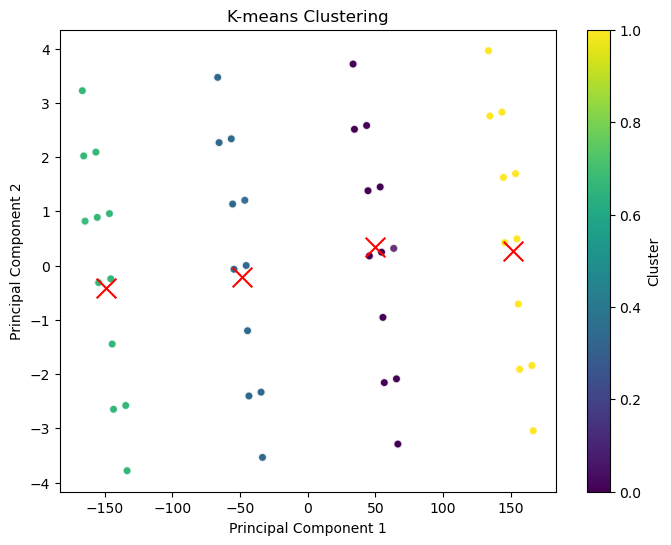

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8, edgecolors='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=200, label='Cluster Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [50]:
cluster_labels

array([0, 1, 1, ..., 3, 2, 1])

In [25]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(pca_data, cluster_labels)
print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 0.23623283748979246


In [26]:
rfm_features['cluster_labels']=cluster_labels

C:\Users\laasa\AppData\Local\Temp\ipykernel_17312\3721899253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_features['cluster_labels']=cluster_labels


In [27]:
rfm_features.head()

,Recency,Frequency,Monetary(Money_Spent),RFM_Segment,RFM_Score,cluster_labels
0,2,4,4,244,10,0
1,3,1,1,311,5,1
2,3,4,3,343,10,1
3,3,1,1,311,5,1
4,1,3,3,133,7,3


In [28]:
rfm_features[rfm_features['cluster_labels']==0]['RFM_Score'].sort_values().unique()

array([ 4,  5,  6,  7,  8,  9, 10])

In [29]:
rfm_features[rfm_features['cluster_labels']==1]['RFM_Score'].sort_values().unique()

array([ 5,  6,  7,  8,  9, 10, 11])

In [30]:
rfm_features[rfm_features['cluster_labels']==2]['RFM_Score'].sort_values().unique()

array([ 6,  7,  8,  9, 10, 11, 12])

In [31]:
rfm_features[rfm_features['cluster_labels']==3]['RFM_Score'].sort_values().unique()

array([3, 4, 5, 6, 7, 8, 9])

In [32]:
rfm_features[rfm_features['cluster_labels']==0]['RFM_Segment'].sort_values().unique()

array(['211', '212', '214', '221', '222', '223', '224', '232', '233',
       '234', '243', '244'], dtype=object)

In [33]:
rfm_features[rfm_features['cluster_labels']==1]['RFM_Segment'].sort_values().unique()

array(['311', '312', '321', '322', '323', '324', '332', '333', '334',
       '343', '344'], dtype=object)

In [34]:
rfm_features[rfm_features['cluster_labels']==2]['RFM_Segment'].sort_values().unique()

array(['411', '412', '421', '422', '423', '424', '432', '433', '434',
       '442', '443', '444'], dtype=object)

In [35]:
rfm_features[rfm_features['cluster_labels']==3]['RFM_Segment'].sort_values().unique()

array(['111', '112', '121', '122', '123', '124', '132', '133', '134',
       '143', '144'], dtype=object)

In [36]:
rfm_features[rfm_features['cluster_labels']==0]['Recency'].sort_values().unique()

[2]
Categories (4, int64): [4 < 3 < 2 < 1]

In [37]:
rfm_features[rfm_features['cluster_labels']==1]['Recency'].sort_values().unique()

[3]
Categories (4, int64): [4 < 3 < 2 < 1]

In [38]:
rfm_features[rfm_features['cluster_labels']==2]['Recency'].sort_values().unique()

[4]
Categories (4, int64): [4 < 3 < 2 < 1]

In [39]:
rfm_features[rfm_features['cluster_labels']==3]['Recency'].sort_values().unique()

[1]
Categories (4, int64): [4 < 3 < 2 < 1]

In [40]:
rfm_features[rfm_features['cluster_labels']==0]['Frequency'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [41]:
rfm_features[rfm_features['cluster_labels']==1]['Frequency'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [42]:
rfm_features[rfm_features['cluster_labels']==2]['Frequency'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [43]:
rfm_features[rfm_features['cluster_labels']==3]['Frequency'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [44]:
rfm_features[rfm_features['cluster_labels']==0]['Monetary(Money_Spent)'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [45]:
rfm_features[rfm_features['cluster_labels']==1]['Monetary(Money_Spent)'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [46]:
rfm_features[rfm_features['cluster_labels']==2]['Monetary(Money_Spent)'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [47]:
rfm_features[rfm_features['cluster_labels']==3]['Monetary(Money_Spent)'].sort_values().unique()

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

##### Cluster 0:  They are not the most recent but are still engaged with the business to some extent.
##### Cluster 1: seems to be the most balanced, with moderately recent customers showing consistent engagement and spending. They might be regular customers with different spending behaviors.

##### Cluster 2: They are the most engaged with the business, making recent purchases across different spending levels.
##### Cluster 3:  They may have made fewer recent purchases or have been less engaged with the business over time.
###### Focus:
###### Cluster 2 appears to be the most focused cluster as it represents the most recent and engaged customers with the highest RFM scores. Targeting strategies such as personalized offers, loyalty rewards, or exclusive promotions could be effective in retaining and further engaging these customers.
##### If the goal is to increase overall revenue, focusing on Cluster 2 (high recency but low spending) might be beneficial. However, if the goal is to increase engagement, Cluster 3 (very recent but low spending) might be a priority.
##### cluster 0:Targeted marketing efforts focusing on increasing frequency or encouraging higher monetary spending could be effective.
###### cluster 1: Targeted marketing efforts focusing on enhancing customer loyalty or providing incentives for increased spending could be beneficial.
##### cluster 3:Re-engagement strategies such as targeted promotions, reminders, or personalized incentives could be employed to reignite their interest and encourage repeat purchases.
